# Hands-On Assignment 5

In this assignment, you will practice everything that you have learned so far in an end-to-end setting.
You will be provided with a dataset that is **unique to you**, and your task is to perform
all the steps from previous assignments to clean, explore, visualize, and analyze your dataset.

**Written Portion**: Additionally, you will create a report that describes your process and provides insights about your dataset.
Each section that should appear in your report is noted with an orange star (like normal HO tasks).  The report should be  4-6 pages (12 pt font, 1.5 line spacing), and turned in on Canvas as a Pframe.

The coding aspect for this assignment will be turned in the same was as all other HO's,
by submitting this file to the autograder.


For this assignment, feel free to make additional functions instead of implementing everything in the provided function.

The objective of this assignment is for you to apply and solidify the skills you have learned in previous assignments.

# Prompt

You have graduated from this class, and are a huge success!
You landed a job doing data science at some fancy company.

You just got a new client with some really interesting problems you get to solve.
Unfortunately, because of a big mess-up on their side the data's metadata got corrupted up
(and the person that used to maintain the data just took a vow of silence and moved to a bog).

The only column you are sure about is the `label` column,
which contains a numeric label for each row.
Aside from that, the client does not know anything about the names, content, or even data types for each column.

Your task is to explore, clean, and analyze this data.
You should have already received an email with the details on obtaining your unique data.
Place it in the same directory as this notebook (and your `local_grader.py` script) and name it `data.txt`.

*I know this prompt may sound unrealistic, but I have literally been in a situation exactly like this.
I was working at a database startup, and one of our clients gave us data with over 70 columns and more than a million records and told us:
"The person who used to manage the data is no longer working with us, but this was the data they used to make all their decisions.
We also lost all the metadata information, like column names."
...
Working in industry is not always glamorous.
-Eriq*

# Part 0: Explore Your Data

Before you start doing things to/with your data, it's always a good idea to load up your data and take a look.

In [36]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import ttest_ind
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
# Modify this to point to your data.
unique_data = pd.read_csv('data1.csv', sep = ",")
unique_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,221507368,03/23/2022 12:00:00 AM,02/01/2020 12:00:00 AM,1,15,N Hollywood,1504,2,860,BATTERY WITH SEXUAL CONTACT,...,IC,Invest Cont,860,NaN,NaN,NaN,11700 RUNNYMEDE ST,NaN,34.2057,-118.3878
375,240904504,01/13/2024 12:00:00 AM,01/13/2020 12:00:00 AM,1150,9,Van Nuys,955,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,14200 CHANDLER BL,NaN,34.1684,-118.4423
376,221409128,04/12/2022 12:00:00 AM,04/20/2020 12:00:00 AM,950,14,Pacific,1444,2,886,DISTURBING THE PEACE,...,AO,Adult Other,886,NaN,NaN,NaN,13600 MARINA POINT DR,NaN,33.9876,-118.4489
377,221205529,01/28/2022 12:00:00 AM,01/01/2020 12:00:00 AM,5,12,77th Street,1259,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121,812.0,NaN,NaN,800 E 77TH ST,NaN,33.9694,-118.2608


Don't forget to checkout the column information.

In [37]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           379 non-null    int64  
 1   Date Rptd       379 non-null    object 
 2   DATE OCC        379 non-null    object 
 3   TIME OCC        379 non-null    int64  
 4   AREA            379 non-null    int64  
 5   AREA NAME       379 non-null    object 
 6   Rpt Dist No     379 non-null    int64  
 7   Part 1-2        379 non-null    int64  
 8   Crm Cd          379 non-null    int64  
 9   Crm Cd Desc     379 non-null    object 
 10  Mocodes         350 non-null    object 
 11  Vict Age        379 non-null    int64  
 12  Vict Sex        360 non-null    object 
 13  Vict Descent    360 non-null    object 
 14  Premis Cd       379 non-null    int64  
 15  Premis Desc     379 non-null    object 
 16  Weapon Used Cd  92 non-null     float64
 17  Weapon Desc     92 non-null     obj

And any numeric information.

In [38]:
unique_data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,3.790000e+02,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,92.000000,379.000000,34.000000,0.0,0.0,379.000000,379.000000
mean,2.242613e+08,1126.617414,11.118734,1157.786280,1.736148,488.688654,31.728232,446.306069,405.782609,488.501319,858.588235,NaN,NaN,34.076365,-118.357472
std,7.427299e+06,605.270462,5.811332,580.593178,0.441303,220.361891,19.226924,174.802871,74.881566,220.082769,55.596009,NaN,NaN,0.117795,0.102390
min,1.903265e+08,1.000000,1.000000,111.000000,1.000000,121.000000,-2.000000,101.000000,102.000000,121.000000,812.000000,NaN,NaN,33.723400,-118.629400
25%,2.207129e+08,800.000000,6.000000,666.000000,1.000000,354.000000,18.500000,501.000000,400.000000,354.000000,820.000000,NaN,NaN,34.002000,-118.432000
50%,2.217080e+08,1200.000000,12.000000,1215.000000,2.000000,354.000000,30.000000,501.000000,400.000000,354.000000,860.000000,NaN,NaN,34.058200,-118.327700
75%,2.310109e+08,1535.000000,16.000000,1643.000000,2.000000,649.000000,45.000000,502.000000,400.000000,649.000000,860.000000,NaN,NaN,34.170950,-118.276500
max,2.419045e+08,2346.000000,21.000000,2198.000000,2.000000,956.000000,89.000000,801.000000,511.000000,956.000000,998.000000,NaN,NaN,34.321000,-118.164300


<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Introduction</h4>

Briefly describe the dataset you’re given and define the goal of the project and how you approach it.
For example, you can present a basic introduction of your data (shape and proposed data types)
and your goal is to use these features to predict the label of the response variable.
Then you propose a few models that are suitable for this project which will be introduced in the modeling section.

# Part 1: Data Cleaning

As always, we should start with data cleaning.
Take what you learned from HO3 to clean up this messy data to a point where it is ready for machine learning algorithms.

Some things you may want to do:
 - Deal with missing/empty values.
 - Fix numeric columns so that they actually contain numbers.
 - Remove inconsistencies from columns.
 - Assign a data type to each column.

  return cleaned_frame<h4 style="color: darkorange; font-size: x-large";>★ Task 1.A</h4>

Complete the following function that takes in a DataFrame and outputs a clean version of the DataFrame.
You can assume that the frame has all the same structure as your unique dataset.
You can return the same or a new data frame.

In [39]:
def guess_types(frame):
    for column in frame.columns:
        int_count = 0
        flt_count = 0
        str_count = 0
        for i in frame[column]:
            if i == np.nan:
                continue
            if type(i) is type(1.1):
                flt_count += 1
            elif type(i) is type(1):
                int_count += 1
            else:
                if str_count > 4:
                    break
                str_count += 1
        try:
            if int_count >= str_count and flt_count == 0:
                frame[column] = frame[column].astype(int)
            elif str_count >= flt_count and str_count >= int_count:
                print(".", end="")
                frame[column] = frame[column].astype(str)
            else:
                frame[column] = frame[column].astype(float)
        except ValueError:
            frame[column] = frame[column].astype(str)
    return frame
def convert_column_types(frame, column_types):
    new_frame = pd.DataFrame()  # Create an empty DataFrame to store converted data

    # Iterate through columns in the original DataFrame
    for col, dtype in column_types.items():
        # Convert each column to the specified type and add it to the new DataFrame
        if dtype == int:
            # If the target type is int, check for NaN values before conversion
            if frame[col].notna().all():
                new_frame[col] = frame[col].astype(dtype)
            else:
                new_frame[col] = frame[col].astype(float)
        else:
            new_frame[col] = frame[col].astype(dtype)

    return new_frame
def clean_data(frame, ignore_columns = ['col_02', 'col_03', 'col_09']):
    for column in frame.columns:
        if column not in ignore_columns:
            for i in range(len(frame)):
                cell = frame.at[i, column]
                if isinstance(cell, str):
                    # Remove commas from numbers
                    cell = cell.replace(',', '')
                    # Extract numbers
                    numbers = re.findall(r'[-+]?\d*\.\d+|\d+', cell)
                    if len(numbers) > 0:
                        # Check if the number is a percentage
                        if '%' in cell:
                            number = float(numbers[0]) / 100
                        else:
                            # Convert to int if no decimal point is present
                            if '.' not in numbers[0]:
                                number = int(numbers[0])
                            else:
                                number = float(numbers[0])
                        frame.at[i, column] = number
                    else:
                        frame.at[i, column] = np.nan
    guess_types(frame)
    return frame
unique_data = clean_data(unique_data)
unique_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3,3,2130,7,NaN,784,1,510,NaN,...,NaN,NaN,510,998.0,NaN,NaN,1900.0,NaN,34.0375,-118.3506
1,200106753,2,2,1800,1,NaN,182,1,330,NaN,...,NaN,NaN,330,998.0,NaN,NaN,1000.0,NaN,34.0444,-118.2628
2,200320258,11,11,1700,3,NaN,356,1,480,NaN,...,NaN,NaN,480,NaN,NaN,NaN,1400.0,NaN,34.0210,-118.3002
3,200907217,5,3,2037,9,NaN,964,1,343,950.01,...,NaN,NaN,343,NaN,NaN,NaN,14000.0,NaN,34.1576,-118.4387
4,220614831,8,8,1200,6,NaN,666,2,354,NaN,...,NaN,NaN,354,NaN,NaN,NaN,1900.0,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,221507368,3,2,1,15,NaN,1504,2,860,NaN,...,NaN,NaN,860,NaN,NaN,NaN,11700.0,NaN,34.2057,-118.3878
375,240904504,1,1,1150,9,NaN,955,2,354,NaN,...,NaN,NaN,354,NaN,NaN,NaN,14200.0,NaN,34.1684,-118.4423
376,221409128,4,4,950,14,NaN,1444,2,886,NaN,...,NaN,NaN,886,NaN,NaN,NaN,13600.0,NaN,33.9876,-118.4489
377,221205529,1,1,5,12,77.0,1259,1,121,NaN,...,NaN,NaN,121,812.0,NaN,NaN,800.0,NaN,33.9694,-118.2608


Now we should also be able to view all the numeric columns.

<Axes: >

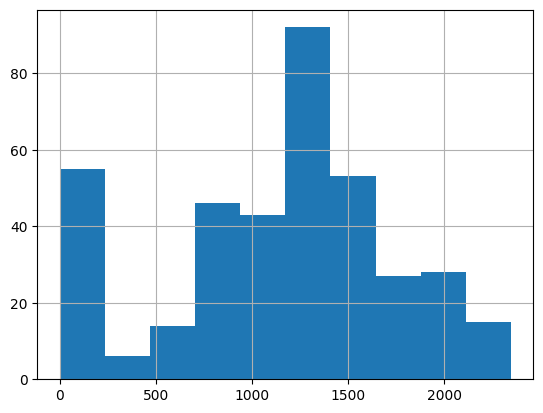

In [40]:
unique_data['TIME OCC'].hist()

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Data Cleaning</h4>

Describe the steps you took for data cleaning.
Why did you do this?
Did you have to make some choices along the way? If so, describe them.

# Part 2: Data Visualization

Once you have cleaned up the data, it is time to explore it and find interesting things.
Part of this exploration, will be visualizing the data in a way that makes it easier for yourself and others to understand.
Use what you have learned in HO1 and HO2 to create some visualizations for your dataset.

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Data Visualization</h4>

Create at least two different visualizations that help describe what you see in your dataset.
Include these visualizations in your report along with descriptions of
how you created the visualization,
what data preparation you had to do for the visualization (aside from the data cleaning in the previous part),
and what the visualization tells us about the data.

# Part 3: Modeling

Now that you have a good grasp of your clean data,
it is time to do some machine learning!
(Technically all our previous steps were also machine learning,
but now we get to use classifiers!)

Use the skills you developed to select **three** classifiers and implement them on your data.
For example, you can narrow down your choices to three classifiers which may include:
- Logistic regression
- K-nearest neighbors
- Decision tree
- Or others

<h4 style="color: darkorange; font-size: x-large";>★ Task 3.A</h4>

Complete the following function that takes in no parameters,
and returns a list with **three** untrained classifiers you are going to explore in this assignment.
This method may set parameters/options for the classifiers, but should not do any training/fitting.

For example, if you wanted to use logistic regression,
then **one** of your list items may be:
```
sklearn.linear_model.LogisticRegression()
```

In [41]:
def create_classifiers():
    classifiers = [
        RandomForestClassifier(),
        LogisticRegression(),
        GradientBoostingClassifier()
    ]
    return classifiers
my_classifiers = create_classifiers()
my_classifiers

[RandomForestClassifier(), LogisticRegression(), GradientBoostingClassifier()]

Now that we have some classifiers, we can see how they perform.

<h4 style="color: darkorange; font-size: x-large";>★ Task 3.B</h4>

Complete the following function that takes in an untrained classifier, a DataFrame, and a number of folds.
This function should run k-fold cross validation with the classifier and the data,
and return a list with the accuracy of each run of cross validation.
You can assume that the frame has the column `label` and the rest of the columns can be considered clean numeric features.

Note that you may have to break your frame into features and labels to do this.
Do not change the passed-in frame (make copies instead).

If you are getting any `ConvergenceWarning`s you may either ignore them,
or try and address them
(they will not affect your autograder score, but may be something to discuss in the written portion of this assignment).

In [45]:
def cross_fold_validation(classifier, frame, folds):
    # Fill NaN values in the dataframe
    frame.fillna(method='ffill', inplace=True)
    
    # Extract features and labels
    X = frame.drop(columns=['DR_NO']).values
    y = frame['DR_NO'].values
    
    # Initialize k-fold cross-validation
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    
    # Store accuracy scores for each fold
    accuracy_scores = []
    
    # Perform cross-validation
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index] # Features
        y_train, y_test = y[train_index], y[test_index] # Labels
        
        # Initialize SimpleImputer for each fold (if needed)
        # imputer = SimpleImputer(strategy='median')
        
        # Impute missing values separately for train and test sets (if needed)
        # X_train_imputed = imputer.fit_transform(X_train)
        # X_test_imputed = imputer.transform(X_test)
        
        # Train classifier
        classifier.fit(X_train, y_train)
        
        # Predict on test set
        y_pred = classifier.predict(X_test)
        
        # Calculate accuracy and store
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    
    return accuracy_scores

my_classifiers_scores = []
for classifier in my_classifiers:
    accuracy_scores = cross_fold_validation(classifier, unique_data, 5)
    my_classifiers_scores.append(accuracy_scores)
    print("Classifier: %s, Accuracy: %s." % (type(classifier).__name__, accuracy_scores))

C:\Users\benli\AppData\Local\Temp\ipykernel_6964\1720977066.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  frame.fillna(method='ffill', inplace=True)


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<h4 style="color: darkorange; font-size: x-large";>★ Task 3.C</h4>

Complete the following function that takes in two equally-sized lists of numbers and a p-value.
This function should compute whether there is a statistical significance between
these two lists of numbers using a [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)
at the given p-value.
Return `True` if there is a statistical significance, and `False` otherwise.
Hint: If you wish, you may use the `ttest_ind()` [method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) provided in the scipy package. 

In [14]:
def significance_test(a_values, b_values, p_value):
    # Perform t-test
    t_statistic, p_val = ttest_ind(a_values, b_values)

    # Compare p-value to threshold
    return p_val < p_value

for i in range(len(my_classifiers)):
    for j in range(i + 1, len(my_classifiers)):
        significant = significance_test(my_classifiers_scores[i], my_classifiers_scores[j], 0.10)
        print("%s vs %s: %s" % (type(my_classifiers[i]).__name__,
                                type(my_classifiers[j]).__name__, significant))

RandomForestClassifier vs SVC: True
RandomForestClassifier vs DecisionTreeClassifier: True
SVC vs DecisionTreeClassifier: True


<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Modeling</h4>

Describe the classifiers you have chosen.
Be sure to include all details about any parameter settings used for the algorithms.

Compare the performance of your models using k-fold validation.
You may look at accuracy, F1 or other measures.

Then, briefly summarize your results.
Are your results statistically significant?
Is there a clear winner?
What do the standard deviations look like, and what do they tell us about the different models?
Include a table like Table 1.

<center>Table 1: Every table need a caption.</center>

| Model | Mean Accuracy | Standard Deviation of Accuracy |
|-------|---------------|--------------------------------|
| Logistic Regression | 0.724 | 0.004
| K-Nearest Neighbor | 0.750 | 0.003
| Decision Tree | 0.655 | 0.011

# Part 4: Analysis

Now, take some time to go over your results for each classifier and try to make sense of them.
 - Why do some classifiers work better than others?
 - Would another evaluation metric work better than vanilla accuracy?
 - Is there still a problem in the data that should fixed in data cleaning?
 - Does the statistical significance between the different classifiers make sense?
 - Are there parameters for the classifier that I can tweak to get better performance?

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Analysis</h4>

Discuss your observations, the relationship you found, and how you applied concepts from the class to this project.
For example, you may find that some feature has the most impact in predicting your response variable or removing a feature improves the model accuracy.
Or you may observe that your training accuracy is much higher than your test accuracy and you may want to explain what issues may arise.

# Part 5: Conclusion

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Conclusion</h4>

Briefly summarize the important results and conclusions presented in the project.
What are the important points illustrated by your work?
Are there any areas for further investigation or improvement?

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: References</h4>

Include a standard bibliography with citations referring to techniques or published papers you used throughout your report (if you used any).

For example:
```
[1] Derpanopoulos, G. (n.d.). Bayesian Model Checking & Comparison.
https://georgederpa.github.io/teaching/modelChecking.html.
```

# Part XC: Extra Credit

So far you have used a synthetic dataset that was created just for you.
But, data science is always more interesting when you are dealing with actual data from the real world.
Therefore, you will have an opportunity for extra credit on this assignment using real-world data.

For extra credit, repeat the **written tasks** of Parts 0 through 4 with an additional dataset that you find yourself.
For the written portion of the extra credit for Part 0, include information about where you got the data and what the data represents.
You may choose any dataset that represents real data (i.e., is **not** synthetic or generated)
and is **not** [pre-packaged in scikit-learn](https://scikit-learn.org/stable/datasets.html).

Below are some of the many places you can start looking for datasets:
 - [Kaggle](https://www.kaggle.com/datasets) -- Kaggle is a website focused around machine learning competitions,
       where people compete to see who can get the best results on a dataset.
       It is very popular in the machine learning community and has thousands of datasets with descriptions.
       Make sure to read the dataset's description, as Kaggle also has synthetic datasets.
 - [data.gov](https://data.gov/) -- A portal for data from the US government.
        The US government has a lot of data, and much of it has to be available to the public by law.
        This portal contains some of the more organized data from several different government agencies.
        In general, the government has A LOT of interesting data.
        It may not always be clean (remember the CIA factbook), but it is interesting and available.
        All data here should be real-world, but make sure to read the description to verify.
 - [UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php) -- UC Irvine has their own data repository with a few hundred datasets on many different topics.
        Make sure to read the dataset's description, as UCI also has synthetic datasets.
 - [WHO's Global Health Observatory](https://apps.who.int/gho/data/node.home) -- The World Health Organization keeps track of many different health-related statistics for most of the countries in the world.
        All data here should be real-world, but make sure to read the description to verify.
 - [Google's Dataset Search](https://datasetsearch.research.google.com/) -- Google indexes many datasets that can be searched here.

You can even create a dataset from scratch if you find some data you like that is not already organized into a specific dataset.
The only real distinction between "data" and a "dataset" is that a dataset is organized and finite (has a fixed size).

Create a new section in your written report for this extra credit and include all the written tasks for the extra credit there.
Each written task/section that you complete for your new dataset is eligible for extra credit (so you can still receive some extra credit even if you do not complete all parts).
There is no need to submit any code for the extra credit.
If you created a new dataset, include the dataset or links to it with your submission.